# 13장 - 텐서플로를 사용한 신경망 훈련 (part 2)

# 텐서플로로 신경망 모델 만들기

텐서플로는 유연하지만 사이킷런과 같은 머신 러닝 라이브러리보다 좀 더 복잡하기 때문에 간단한 선형 회귀 모델부터 시작해본다.

## 텐서플로 케라스 API(tf.keras)

케라스는 고수준 신경망 API로서 원래 텐서플로와 씨아노(Theano)처럼 여러 라이브러리 위에서 실행하도록 개발되었다. 케라스는 사용자에게 편리하고 편리하고 모듈식 프로그래밍 인터페이스를 제공하기 때문에 몇 줄의 코드로 복잡한 모델을 빠르게 만들 수 있다.  

케라스는 PyPI에서 별도로 설치한 후 백엔드 엔진으로 텐서플로를 사용하도록 설정할 수 있다. 케라스는 텐서플로와 밀접하게 통합되어 있어 별도의 설치 없이 tf.keras에서 바로 사용할 수 있다. 텐서플로 2.0에서 tf.keras가 텐서플로의 대표 API가 되었으며 모델을 만드는 데 권장되는 방법이다.  

케라스 API(tf.keras)는 신경망 모델을 매우 쉽게 만든다. 텐서플로에서 신경망을 만드는 데 가장 널리 사용되는 방법은 층을 쌓아 모델을 만드는 `tf.keras.Sequential()` 클래스이다. 층을 파이썬 리슽으로 쌓아 `tf.keras.Sequential()`에 전달하여 모델을 만들 수 있다. 또는 `.add()`메서드를 사용하여 층을 하나씩 추가할 수도 있다.  

이외에도 tf.keras에서는 t`f.keras.Model` 클래스를 상속하여 모델을 정의할 수 있다. 이렇게 하면 모델 클래스가 정방향 계산 동안 해야 할 일을 명시적으로 `call()` 메서드에서 정의할 수 있다. tf.keras API를 사용하여 이 두 가지 방법으로 신경망 모델을 만드는 예제를 만들어 보자.  

## 선형 회귀 모델 만들기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


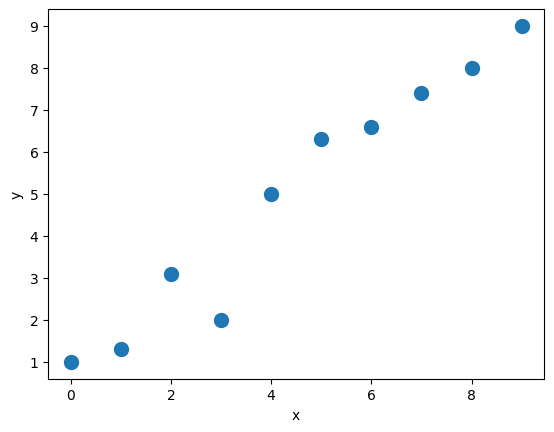

In [2]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
# plt.savefig('images/13_5.png', dpi=300)
plt.show()

특성을 표준화(평균을 원점에 맞추고 표준 편차로 나눔)하고 텐서플로 Dataset을 만든다.

In [3]:
X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32)))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-22 14:17:50.260091: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 14:17:50.260208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


이제 $z=wx+b$와 같은 선형 회귀 모델을 정의한다. 여기서 케라스 API를 사용한다.  

이 선형 회귀 모델을 위해 `tf.keras.Model` 클래스에서 상속받은 새로운 클래스를 정의한다. `tf.keras.Model` 클래스를 상속하면 모델 탐색, 훈련, 평가를 위한 케라스 도구를 사용할 수 있다. 이 클래스 생성자에 모델 파라미터 w와 b를 정의한다. 각각 가중치와 절편에 해당한다. 마지막으로 이 모델이 입력 데이터를 사용하여 어떻게 출력을 만드는지 정의하는 `call()` 메서드를 작성한다. 

In [4]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b

그다음 `MyModel()` 클래스로부터 새로운 모델 객체를 만든다. 훈련 데이터를 기반으로 이 객체를 훈련할 수 있다.  
텐서플로 케라스 API는 `tf.keras.Model`로 만든 모델을 위해 `.summary()` 메서드를 제공한다. 이 메서드는 층마다 모델 구성 요소를 요약하고 각 층의 파라미터 개수를 알려준다.  
`tf.keras.Model` 클래스를 상속받아 만들었기 때문에 역시 `.summary()` 메서드를 사용할 수 있다. 하지만 `model.summary()`를 호출하려면 먼저 입력 차원(특성 개수)을 모델에 지정해야 한다. `model.build()`를 호출할 때 입력 데이터의 예상 크기를 지정할 수 있다. 

In [5]:
model = MyModel()

model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


`model.build()`에 기대하는 입력 텐서의 첫 번째 차원을 **None**으로 지정했다. 이렇게 하면 임의의 배치 크기를 사용할 수 있다. 하지만 특성 개수(여기서는 1)는 모델의 가중치 파라미터 개수와 직접적으로 관련되기 때문에 고정적이다.  
객체를 만든 후 `.build()` 메서드를 호출하여 모델 층과 파라미터를 만드는 방법을 변수 지연 생성(late variable creation)이라고 한다. 이 모델은 간단하기 때문에 생성자에서 이미 모델 파라미터를 만들었다. 따라서 `build()`에 지정한 `input_shape`은 파라미터에 영향을 미치지 않는다. 하지만 `model.summary()`를 호출할 때 필요하다.  

모델을 정의하고 난 후 최적의 모델 가중치를 찾기 위해 최소화할 비용 함수를 정의할 수 있다. 여기서는 **평균 제곱 오차**(Mean Squared Error, MSE)를 비용 함수로 사용한다. 또한, 모델의 가중치 파라미터를 학습시키기 위해 학률적 경사 하강법을 사용한다. 

In [6]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


## testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

하이퍼파라미터를 지정하고 이 모델을 200번의 에포크 동안 훈련한다. 데이터셋의 배치를 만들고 `count=None`으로 이 데이터셋을 반복한다. 이렇게 하면 무한히 반복하는 데이터셋을 만들 수 있다. 

In [7]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [8]:
tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))


ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('에포크 {:3d} 스텝 {:4d} 손실 {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

에포크   0 스텝    0 손실 43.5600
에포크  10 스텝  100 손실 0.7530
에포크  20 스텝  200 손실 20.1759
에포크  30 스텝  300 손실 23.3976
에포크  40 스텝  400 손실 6.3481
에포크  50 스텝  500 손실 4.6356
에포크  60 스텝  600 손실 0.2411
에포크  70 스텝  700 손실 0.2036
에포크  80 스텝  800 손실 3.8177
에포크  90 스텝  900 손실 0.9416
에포크 100 스텝 1000 손실 0.7035
에포크 110 스텝 1100 손실 0.0348
에포크 120 스텝 1200 손실 0.5404
에포크 130 스텝 1300 손실 0.1170
에포크 140 스텝 1400 손실 0.1195
에포크 150 스텝 1500 손실 0.0944
에포크 160 스텝 1600 손실 0.4670
에포크 170 스텝 1700 손실 2.0695
에포크 180 스텝 1800 손실 0.0020
에포크 190 스텝 1900 손실 0.3612


훈련된 모델을 확인하고 그래프로 그려보자.  
테스트 데이터로 0에서 9까지 균일한 간격의 값을 가진 넘파이 배열을 만든다. 표준화된 특성으로 모델을 훈련했기 때문에 동일한 표준화를 테스트 데이터에도 적용한다. 

최종 파라미터: 2.6576622 4.8798566


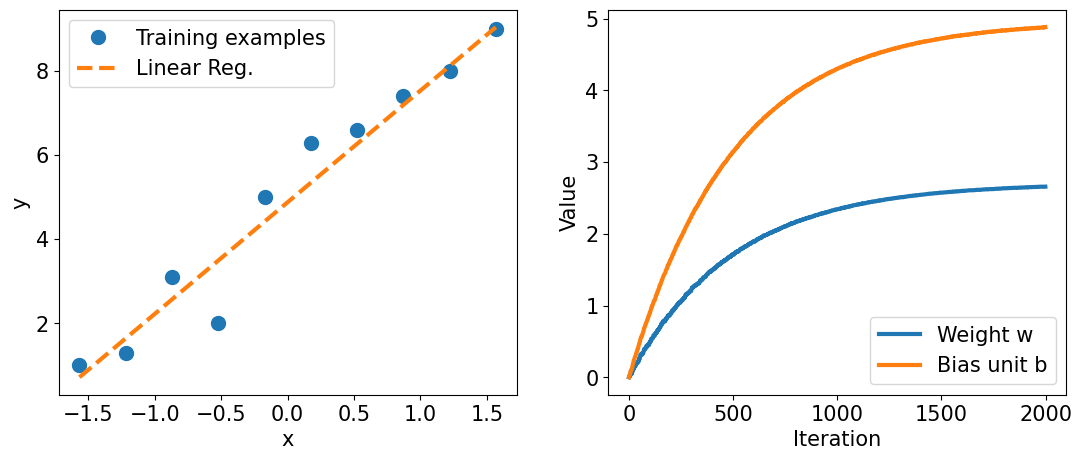

In [9]:
print('최종 파라미터:', model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('images/13_6.png', dpi=300)
plt.show()

위 그림은 훈련 샘플의 산점도와 훈련된 선형 회귀 모델을 보여 준다. 또한, 가중치 w와 절편 b가 수렴되는 과정도 보여준다.

## .compile()과 .fit() 메서드를 사용한 모델 훈련

앞의 예제에서 직접 `train()` 함수를 만들고 확률적 경사 하강법 최적화를 적용하여 모델을 훈련하는 방법을 알아보았다. 하지만 프로젝트마다 `train()` 함수를 작성하는 것은 반복적인 작업이다.  
텐서플로 케라스 API는 모델 객체에서 호출할 수 있는 편리한 `.fit()` 메서드를 제공한다.  
어떻게 동작하는지 알아보기 위해 새로운 모델을 만든 후 옵티마이저(optimizer), 손실 함수, 평가 지표를 선택하여 컴파일 해보자.

In [10]:
tf.random.set_seed(1)
model = MyModel()
#model.build((None, 1))

model.compile(optimizer='sgd', 
              loss=loss_fn,
              metrics=['mae', 'mse'])

이제 간단히 `fit()` 메서드를 호출하여 모델을 훈련할 수 있다. 하지만 여기서는 데이터셋을 만들지 않고 직접 넘파이 배열 x와 y를 전달할 수 있는지 보자.

In [12]:
model.fit(X_train_norm, y_train, 
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

Epoch 1/200
10/10 [==============================] - 0s 5ms/step - loss: 0.4134 - mae: 0.4831 - mse: 0.4134
Epoch 2/200
10/10 [==============================] - 0s 6ms/step - loss: 0.4138 - mae: 0.4919 - mse: 0.4138
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4138 - mae: 0.4859 - mse: 0.4138
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4138 - mae: 0.4854 - mse: 0.4138
Epoch 5/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4138 - mae: 0.4853 - mse: 0.4138
Epoch 6/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4140 - mae: 0.4886 - mse: 0.4140
Epoch 7/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4133 - mae: 0.4844 - mse: 0.4133
Epoch 8/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4140 - mae: 0.4880 - mse: 0.4140
Epoch 9/200
10/10 [==============================] - 0s 4ms/step - loss: 0.4140 - mae: 0.4902 - mse: 0.4140
Epoch 10/200
10/10 [========

2.7067397 4.965721


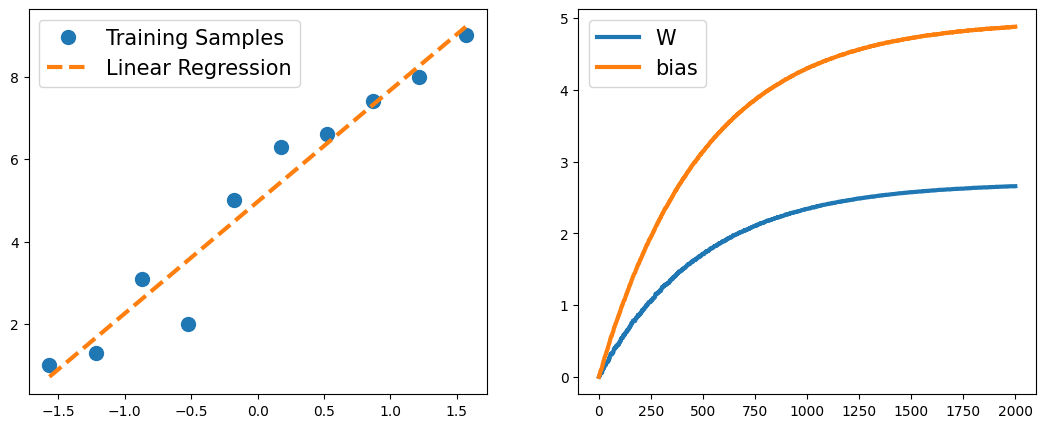

In [13]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

## 붓꽃 데이터셋을 분류하는 다층 퍼셉트론 만들기

텐서플로는 신경망 모델의 기초 구성 요소로 사용할 수 있도록 `tf.keras.layers` 아래에 미리 만들어 놓은 층을 제공한다. 이 절에서 붓꽃 데이터셋을 사용한 분류 문제를 풀기 위해 이런 층을 사용하는 방법을 배워본다.  
이 절에서 붓꽃 데이터셋을 사용한 분류 문제를 풀기 위해 이런 층을 사용하는 방법을 배워본다. 또한, 케라스 API를 사용하여 두 개의 층을 가진 퍼셉트론을 만들어 보자.  
먼저 tensorflow_datasets에서 데이터를 가져온다.

In [17]:
import tensorflow_datasets as tfds


iris, iris_info = tfds.load('iris', with_info=True)

print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='/Users/hanhyeongu/tensorflow_datasets/iris/2.0.0',
    file_format=tfrecord,
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        

출력된 정보를 보면 이 데이터셋은 하나의 덩어리로 전달된다. 따라서 이 데이터셋을 직접 훈련 데이터셋과 테스트 데이터셋으로 나누어야 한다.  
훈련을 위해 2/3를 사용하고 나머지는 테스트용으로 사용한다고 가정해 보자.  
`tensorflow_datasets` 라이브러리는 `DatasetBuilder` 객체를 통해 데이터셋을 로드하기 전에 슬라이싱과 분할을 정의할 수 있는 간편한 방법을 제공한다.  

또 다른 방법은 먼저 데이터셋을 로드하고 `.take()` 와 `.skip()` 메서드를 사용하여 데이터셋을 두 부분으로 나누는 것이다. 데이터셋이 처음에 섞여 있지 않다면 데이터셋을 섞을 수도 있다. 하지만 이렇게 할 때 매우 주의해야 한다. 이를 피하려면 `.shuffle()` 메서드에 `reshuffle_each_iteration=False` 매개변수를 지정해야 한다. 

In [18]:
tf.random.set_seed(1)

ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [19]:
## 샘플 개수 확인

n = 0
for example in ds_train_orig:
    n += 1
print(n)


n = 0
for example in ds_test:
    n += 1
print(n)

100
50


In [20]:
ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

이제 케라스 API를 사용하여 효율적으로 모델을 만들 준비가 되었다. 특히 `tf.keras.Sequential` 클래스를 사용하면 몇 개의 케라스 층을 쌓아 신경망을 만들 수 있다. 여기서는 완전 연결 층 또는 선형 층이라고도 부르는 Dense 층(`tf.keras.layers.Dense`)을 사용한다. 이 층은 $f(w \times x+b)$로 나타낼 수 있다. 여기서 $x$는 입력 특성이고 $w$와 $b$는 가중치 행렬과 절편 벡터이다. $f$는 활성화 함수이다.  

신경망의 층을 생각하면 각 층은 이전 층으로부터 입력을 받는다. 따라서 차원(랭크와 크기)이 고정된다.  
일반적으로 신경망 구조를 설계할 때 출력 차원만 직접 고려한다.(첫 번째 층은 예외이지만 텐서플로와 케라스는 변수를 지연하여 생성하기 때문에 모델을 만든 후 첫 번째 층의 입력 차원을 결정할 수 있다.)  
여기서는 두 개의 은닉층을 가진 모델을 정의한다. 첫 번째 층은 네 개의 특성을 입력받아 16개의 뉴런에 주입한다. 두 번째 층은 첫 번째 층의 출력(16개)을 받고 세 개의 클래스 레이블이 있기 때문에 세 개의 뉴런에 주입한다. 케라스에서는 `Sequential` 클래스와 `Dense` 층을 사용하여 다음과 같이 구현할 수 있다. 

In [21]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', 
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


input_shape=(4,)로 첫 번째 층의 입력 크기를 결정했다. 따라서 `iris_model.summary()`를 호출하기 위해 `.build()` 메서드를 더 이상 호출할 필요가 없다.  

출력된 모델 요약 정보를 보면 첫 번째 층(fc1)이 80개의 파라미터를 가지고 두 번째 층(fc2)은 51개의 층을 가졌다.  
$(n_{in}+1)\times n_{out}$으로 파라미터 개수를 검증해 볼 수 있다.  
여기에서 $n_{in}$은 입력 유닛의 개수이고 $n_{out}$은 출력 유닛의 개수이다. 완전 연결 (밀집) 층의 학습 가능한 파라미터 개수는 $n_{in} \times n_{out}$크기의 가중치 행렬과 $n_{out}$크기의 절편 벡터이다.  
또한, 첫 번째 층에 시그모이드 활성화 함수를 사용하고 마지막 (출력)층에 소프트맥스 활성화 함수를 사용했다.  
이 예제는 세 개의 클래스 레이블을 가지고 있기 때문에 다중 클래스 분류를 위해 마지막 층에 소프트맥스 활성화 함수를 사용했다.  

그 다음 손실함수, 옵티마이저, 평가 지표를 지정하여 모델을 컴파일한다. 


In [22]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

에포크 횟수를 100으로 지정하고 배치 크기는 2로 지정한다.  
다음 코드에서 무한하게 반복하는 데이터셋을 만들고 모델을 훈련하기 위해 `fit()`에 전달한다. 이 경우에 `fit()` 메서드가 에포크를 관리하기 위해 에포크당 스텝 횟수를 알아야 한다.  

훈련 데이터의 크기(여기서는 100)와 배치 크기(batch_size)가 주어지면 에포크당 스텝 횟수 step_per_epoch를 계산할 수 있다.

In [23]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

2022-11-22 15:03:38.506244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


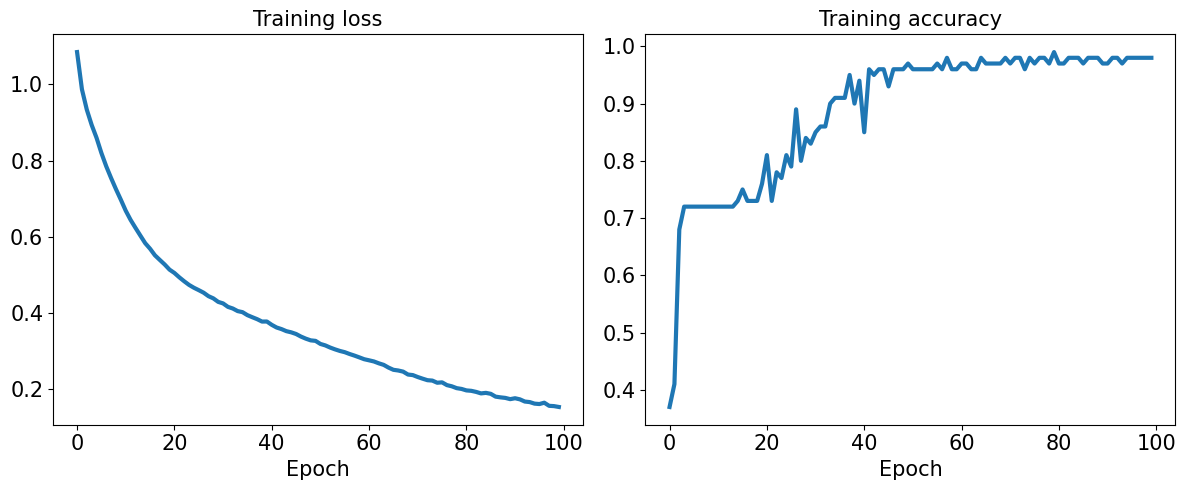

In [24]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('images/13_7.png', dpi=300)
plt.show()

## 테스트 데이터셋에서 훈련된 모델 평가

`iris_model.compile()` 메서드를 호출할 때 평가 지표로 'accuracy'를 지정했기 때문에 테스트 데이터셋에서 모델의 정확도를 바로 평가해 볼 수 있다.

In [25]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('테스트 손실: {:.4f}   테스트 정확도: {:.4f}'.format(*results))

2022-11-22 15:05:44.199270: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


테스트 손실: 0.1552   테스트 정확도: 0.9800


모델 입력이 적절한 차원(랭크)을 가지도록 테스트 데이터셋도 배치로 입력해야 한다.  
앞서 언급했듯이 `.batch()`를 호출하면 추출된 텐서의 랭크가 1만큼 증가한다.  
여기서 배치 크기는 의미가 없지만 `.evaluate()`메 입력할 데이터는 배치를 위한 차원이 하나 있어야 한다. 따라서 `.evaluate()`에 `ds_test.batch(50)`을 전달하면 전체 테스트 데이터셋이 크기가 50인 하나의 배치로 전달될 것이다. 만약 `ds_test.batch(1)`로 쓰면 크기가 1인 50개의 배치가 전달되어 처리된다.

## 훈련된 모델 저장하고 복원

In [26]:
iris_model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

첫  번째 매개변수는 파일 이름이다. `iris_model.save()` 메서드를 호출하면 모델 구조와 학습된 모든 파라미터를 지정한다. 하지만 신경망 구조만 저장하고 싶다면 `iris_model.to_json()` 메서드를 사용할 수 있다. 이 메서드는 모델 설정을 JSON 포맷으로 저장한다. 모델 가중치만 저장하고 싶다면 `iris_model.save_weights()` 메서드를 사용한다. HDF5 포맷일 경우 `save_format` 매개변수를 `'h5'`로 지정하고 텐서플로 포맷일 경우 `'tf'`로 지정한다.  

이제 저장된 모델을 복원해 보자. 모델 구조와 가중치를 모두 저장했기 때문에 한 줄의 코드로 모델과 파라미터를 다시 복원할 수 있다.

In [27]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [28]:
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('테스트 손실: {:.4f}   테스트 정확도: {:.4f}'.format(*results))

테스트 손실: 0.1552   테스트 정확도: 0.9800


2022-11-22 15:14:19.669478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


### Note
케라스 모델의 `fit()` 메서드는 `callbacks` 매개변수를 사용하여 훈련 과정을 제어할 수 있습니다. 이 매개변수는 `keras.callbacks` 아래에 있는 콜백 객체의 리스트를 입력받습니다. 예를 들어 모델을 훈련하는 동안 `ModelCheckpoint` 콜백을 사용하여 최고의 성능을 내는 가중치를 저장할 수 있습니다. `ModelCheckpoint` 콜백은 더 이상 성능이 개선되지 않을 때 훈련을 멈추게 하는 `EarlyStopping` 콜백과 함께 사용하는 경우가 많습니다. `EarlyStopping` 콜백 클래스는 기본적으로 검증 손실을 모니터링합니다. patience 매개변수가 지정한 에포크 횟수 동안 모니터링 지표가 개선되지 않으면 훈련을 중지합니다.  

다음 코드는 `ModelCheckpoint` 콜백을 사용하는 예입니다. 검증 손실을 모니터링하면서(`monitor='val_loss'`) 3번 에포크 동안 검증 손실이 감소하지 않으면 훈련을 중지하고 최상의 모델 가중치로 복원합니다(`restore_best_weights=True`).

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callback_list = [ModelCheckpoint(filepath='iris-earlystopping.h5', 
                                 monitor='val_loss'),
                 EarlyStopping(patience=3, restore_best_weights=True)]

그 다음 `Sequential` 클래스를 사용하지 않고 `iris_model` 모델의 구조를 추출하여 새로운 모델을 만들어 보겠습니다.  

`model_from_json()` 함수를 사용하여 `to_json()` 메서드로 만든 구조로 새로운 모델을 만들 수 있습니다. `compile()` 메서드에 지정한 것은 이전과 동일합니다. `fit()` 메서드에는 `validation_data` 매개변수에 검증 데이터셋으로 사용할 데이터를 전달합니다. 여기에서는 간단한 예를 보는 것이 목적이므로 별도의 검증 데이터셋을 만들지 않고 대신 `ds_test` 데이터셋을 사용하겠습니다. `callbacks` 매개변수에 앞에서 만든 콜백 리스트를 전달합니다. 에포크를 크게 설정해도(`epochs=500`) 조기 종료를 사용하기 때문에 종료 조건이 만족되면 훈련이 중간에 중단될 것입니다.

In [30]:
tf.random.set_seed(1)

model = tf.keras.models.model_from_json(iris_model.to_json())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(ds_train, epochs=500, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=ds_test.batch(50), 
                    callbacks=callback_list,
                    verbose=0)

2022-11-22 15:18:26.914787: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 15:18:27.260277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


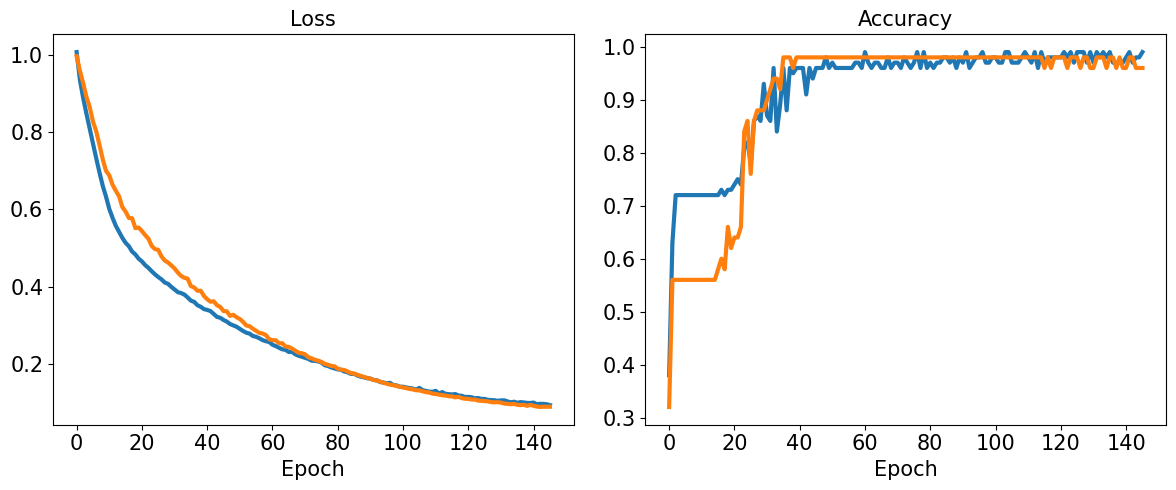

In [31]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
# plt.savefig('images/13_earlystopping.png', dpi=300)
plt.show()

500번의 에포크를 지정했지만 훈련은 200번째 에포크 근처에서 중지되었습니다. 몇 번째 에포크에서 훈련이 중지되었는지 확인하려면 `EarlyStopping` 객체의 `stopped_epoch` 속성을 출력하면 됩니다.

In [32]:
callback_list[1].stopped_epoch

145

### Note
텐서플로의 놀라운 기능 중 하나는 텐서보드(TensorBoard)입니다. 텐서보드는 모델의 학습 과정뿐만 아니라 계산 그래프도 시각화할 수 있는 모듈입니다. 앞서 케라스 API로 만들었던 신경망을 시각화해 보죠. 먼저 텐서보드에 필요한 로그를 위해 콜백 함수를 정의합니다.


In [33]:
from tensorflow.keras.callbacks import TensorBoard

callback_list = [ModelCheckpoint(filepath='iris-earlystopping.h5', 
                                 monitor='val_loss'),
                 EarlyStopping(patience=3, restore_best_weights=True),
                 TensorBoard()]

2022-11-22 15:20:06.282667: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-11-22 15:20:06.282680: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-11-22 15:20:06.283844: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.


텐서보드를 위한 로그가 기록되는 기본 위치는 `logs` 입니다. 저장 위치를 바꾸려면 `TensorBoard` 콜백 클래스의 `log_dir` 매개변수에 지정할 수 있습니다. 그다음 모델 정의, 컴파일, 훈련은 이전과 동일합니다.

In [34]:
tf.random.set_seed(1)

model = tf.keras.models.model_from_json(iris_model.to_json())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(ds_train, epochs=500, 
                    steps_per_epoch=steps_per_epoch, 
                    validation_data=ds_test.batch(50), 
                    callbacks=callback_list,
                    verbose=0)

2022-11-22 15:20:30.015322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 15:20:30.240744: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-11-22 15:20:30.240755: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-11-22 15:20:30.247538: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-22 15:20:30.248492: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-11-22 15:20:30.251511: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2022_11_22_15_20_30
2022-11-22 15:20:30.251903: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_11_22_15_20_30/hanhyeonguui-MacBookPro.local.trace.json.gz
2022-11-22 15

텐서플로 2.0부터는 주피터 노트북에 텐서보드를 포함시킬 수 있습니다. 주피터 노트북에서 다음 명령을 실행하세요.

In [38]:
%reload_ext tensorboard
%tensorboard --logdir logs --port 6006

Reusing TensorBoard on port 6006 (pid 31308), started 0:00:21 ago. (Use '!kill 31308' to kill it.)

# 다층 신경망의 활성화 함수 선택

지금까지 다층 피드포워드 신경망을 쉽게 이해하기 위해 시그모이드 활성화 함수만 설명했다. 12장에서 다층 퍼셉트론을 구현할 때 출력층과 은닉층에 이 함수를 사용했다.  

시그모이드 형태의 로지스틱 함수$\sigma(z)={1 \over {1+e^{-z}}}$을 시그모이드 함수라고 부른다. 머신 러닝 분야에서는 이렇게 부르는 경우가 많다. 다음 절에서 다층 신경망을 구현할 때 사용할 수 있는 다른 비선형 함수를 배워보자. 

기술적으로는 미분 가능하다면 어떤 함수라도 다층 신경망의 활성화 함수로 사용할 수 있다. 아달린에서처럼 선형 활성화 함수도 사용할 수 있다. 실제로는 은닉층이나 출력층에 선형 활성화 함수를 사용하는 것이 그리 유용하지 않다. 복잡한 문제를 해결하기 위해서는 일반적인 인공 신경망에 비선형성이 필요하기 때문이다. 선형 함수를 합치면 결구 하나의 선형 함수가 된다.  

12장에서 사용한 로지스틱 (시그모이드) 활성화 함수가 뉴런 개념을 가장 비슷하게 흉내 낸 함수이다. 이 함수 출력을 뉴런의 활성화 여부에 대한 확률로 생각할 수 있다. 로지스틱 (시그모이드) 활성화 함수는 큰 음수 입력이 들어오면 문제가 된다. 이 경우 시그모이드 함수의 출력이 0에 가까워지기 때문이다. 시그모이드 함수가 0에 가까운 출력을 내면 신경망이 매우 느리게 학습한다. 훈련 과정에서 지역 최솟값에 갇힐 가능성이 높다. 이런 이유로 은닉층에 하이퍼볼릭 탄젠트 함수를 더 선호한다.  

하이퍼볼릭 탄젠트 함수를 배우기 전 로지스틱 함수를 간단히 요약하고 다중 레이블 분류 문제로 일반화해 보자.

## 로지스틱 함수 요약

로지스틱 함수는 시그모이드 함수의 특별한 경우이다.  
3장 로지스틱 회귀에 관한 절에서 로지스틱 함수를 사용하여 이진 분류 문제일 때 샘풀 x가 양성 클래스에 속할 확률을 모델링했다.  

구체적인 예를 들기 위해 2차원 데이터 포인트 x와 다음과 같은 가중치 벡터 w로 구성된 모델을 가정해보자.

In [39]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w)) 

P(y=1|x) = 0.888


이 특성과 가중치 값을 사용하여 최종 입력(z)을 계산하고 이것으로 로지스틱 뉴련의 활성화 출력을 구하면 0.888을 얻는다. 이를 샘플 x가 양성 클래스에 속할 확률이 88.8%라고 해석할 수 있다.  

12장에서 다중 클래스의 진짜 레이블 값을 표현하기 위해 원-핫 인코딩 기법을 사용했고 여러 개의 로지스틱 활성화 유닛으로 출력층을 구성했다. 하지만 다음 코드에서처럼 여러 개의 로지스틱 활성화 유닛으로 구성된 출력층은 의미 있게 해석할 만한 확률 값을 만들지 못한다.

In [40]:
# W : (n_output_units, n_hidden_units+1) 크기의 배열
# 첫 번째 열은 절편 유닛입니다

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : (n_hidden_units + 1, n_samples) 크기의 배열
# 이 배열의 첫 번째 열은 1입니다

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('최종 입력: \n', Z)

print('유닛 출력:\n', y_probas) 

최종 입력: 
 [1.78 0.76 1.65]
유닛 출력:
 [0.85569687 0.68135373 0.83889105]


출력에서 볼 수 있듯이 클래스가 세 개일 떄 결과 확률을 이해하기 어렵다. 그것은 세 값의 합이 1이 아니기 때문이다. 사실 클래스 소속 확률을 구하는 것이 아니라 클래스 레이블을 예측하기 위해서만 사용한다면 큰 문제는 아니다. 앞의 출력 유닛 결과에서 클래스 레이블을 예측하는 방법은 가장 큰 값을 선택하는 것이다.

In [41]:
y_class = np.argmax(Z, axis=0)
print('예측 클래스 레이블: %d' % y_class) 

예측 클래스 레이블: 0


## 소프트맥스 함수를 사용한 다중 클래스 확률 예측

이전 절에서 `argmax` 함수를 사용하여 클래스 레이블을 구하는 방법을 보았다. 앞서 '붓꽃 데이터셋을 분류하는 다층 퍼셉트론 만들기' 절에서 다층 퍼셉트론의 마지막 층을 `activation='softmax'`로 설정했다. 이 `softmax` 함수는 간접저긴 `argmax` 함수이다. 하나의 클래스 인덱스를 찾는 대신 각 클래스의 확률을 반환하므로 다중 클래스 환경(다중 로지스틱 회귀(multinomial logistic regression))에서 의미 있는 클래스 확률을 계산할 수 있다.  

`softmax` 함수는 특정 샘플의 최종 입력이 z일 때 i번째 클래스에 속할 확률을 지수적으로 가중된 선형 함수 합으로 나누어 정규화한 것이다. 

In [42]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('확률:\n', y_probas)

np.sum(y_probas)

확률:
 [0.44668973 0.16107406 0.39223621]


1.0

여기서 보듯이 예측된 클래스 확률 합은 기대했던 대로 1이 되었다. 예측 클래스 레이블은 로지스틱 출력에 argmax 함수를 적용한 것과 같다.  

softmax 함수의 결과를 다중 클래스일 때 의미 있는 클래스 소속 확률을 만들기 위한 정규화된 출력으로 생각하는 것이 좋다. 따라서 텐서플로에서 다중 클래스 분류 모델을 만들 때 입력 배치 샘플의 클래스 소속 확률을 추정하기 위해 `tf.keras.activations.softmax()` 함수를 사용한다. 

In [43]:
import tensorflow as tf

Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

## 하이퍼볼릭 탄젠트로 출력 범위 넓히기

인공 신경망의 은닉층에 많이 사용하는 또 다른 시그모이드 함수는 **하이퍼볼릭 탄젠트**(hyperbolic tangent)(보통 **tanh**라고 함)이다. 이 함수는 스케일이 조정된 로지스틱 함수라고 생각할 수 있다.  

로지스틱 함수에 비해 하이퍼볼릭 탄젠트 함수의 장점은 출력 범위를 (-1,1) 사이로 넓혀서 역전파 알고리즘의 수렴을 향상시킬 수 있는 것이다.  
반면 로지스틱 함수는 (0,1) 범위의 출력 신호를 반환한다. 로지스틱 함수와 하이퍼볼릭 탄젠트를 비교하기 위해 두 시그모이드 함수를 그래프로 그려보자.

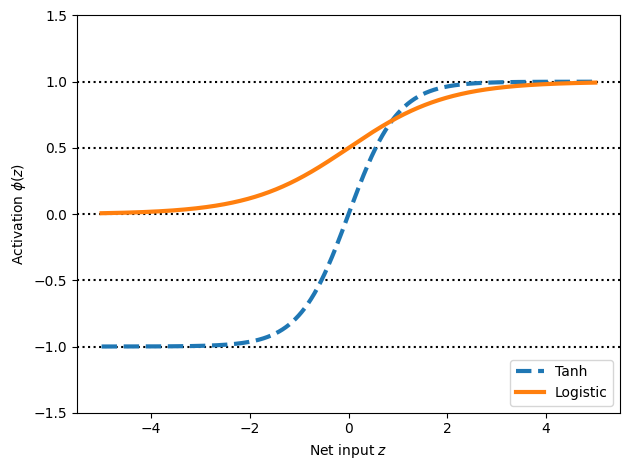

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('images/13_8.png', dpi=300)
plt.show()

여기서 볼 수 있듯이 두 시그모이드 곡선은 매우 비슷하다. 하지만 tanh 함수가 logistic 함수보다 2배 큰 출력 범위를 가진다. 

In [45]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [46]:
import tensorflow as tf

tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

In [47]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [48]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])>

## 렐루 활성화 함수

**렐루**(Rectified Linear Unit, ReLU)는 심층 신경망에 자주 사용되는 또 다른 활성화 함수이다.  
렐루를 알아보기 전에 하이퍼볼릭 탄젠트와 로지스틱 활성화 함수의 그레이디언트 소실 문제를 살펴보자.  

죄종 입력이 $z_{1}=20$에서 $z_{2}=25$로 바뀐다고 가정해보자. 하이퍼볼릭 탄젠트 활성화 함수를 계산하면 $\phi(z_{1})=1.0$과 $\phi(z_{2})=1.0$이므로 출력에 변화가 없다.  

이는 최종 입력에 대한 활성화 함수의 도함수가 z가 커짐에 따라 줄어든다는 뜻이다. 결국 그레이디언트가 0에 아주 가까워지기 때문에 훈련 과정 동안 가중치가 매우 느리게 학습된다. 렐루 활성화 함수는 이런 문제를 해결한다.  

렐루도 신경망이 복잡한 함수를 학습하기에 좋은 비선형 함수이다. 입력 값이 양수이면 입력에 대한 렐루의 도함수는 항상 1이다. 이것이 그레이디언트 소실 문제를 해결해 주므로 심층 신경망에 적합하다. 

In [49]:
import tensorflow as tf

tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>